In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.spatial import distance

# read the data
print('Loading data ...')
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')



Loading data ...


In [ ]:
#combine

#all_data = pd.concat((train_data, test_data), axis=0, ignore_index=True)
#all_data.head()


---
Initialize train data


In [ ]:
# obtain and count the text data
train_text = list(train_data['Text'])
test_text = list(test_data['Text'])
num_of_train = len(train_text)
num_of_test = len(test_text)

# labels of training data
train_label = list(train_data['Category'])

train_data.head()


,ID,Text,Category,Type
0,82577,"[Controversies, Coversations, Cutaneous, Laser...",4,Medical Books
1,79481,"[Biostatistical, Analysis, th, Edition]",4,Medical Books
2,125658,"[Conflict, Culture, Reader]",3,Law
3,201053,"[Romania, Moldova, ITMB, Map, International, T...",5,Travel
4,204615,"[Idaho, Magnificent, Wilderness]",5,Travel


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47199 entries, 0 to 47198
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        47199 non-null  int64 
 1   Text      47199 non-null  object
 2   Category  47199 non-null  int64 
 3   Type      47199 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


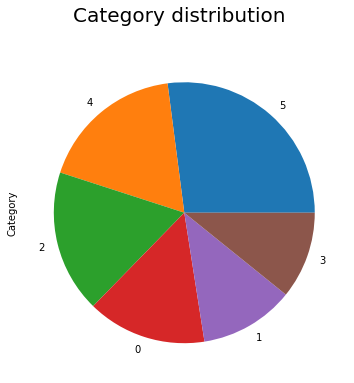

In [ ]:
import matplotlib.pyplot as plt

plt.suptitle('Category distribution', fontsize=20)

train_data["Category"].value_counts().plot.pie(figsize=(6,6))

In [ ]:
import re, string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop = set(stopwords.words('english'))
def tokenize(text):
    """
    sent_tokenize(): segment text into sentences
    word_tokenize(): break sentences into words
    """
    try: 
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
        text = regex.sub(" ", text) # remove punctuation
        
        tokens_ = [nltk.word_tokenize(s) for s in nltk.sent_tokenize(text)]
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent
        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        filtered_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        
        return filtered_tokens
            
    except TypeError as e: print(text,e)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
# apply the tokenizer into the item descriptipn column
nltk.download('punkt')
train_data['Text'] = train_data['Text'].map(tokenize)
test_data['Text']= test_data['Text'].map(tokenize)

train_data.head()

In [ ]:
#def split_cat(text):
#  try: return text.split("/")
#  except: return ("No Label", "No Label", "No Label")


#zip(*train_data['Text'].apply(lambda x: split_cat(x)))
#train_data.head()

In [ ]:
import re
import string
i=0
result=[]
#def tokenization()


from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

def str_stemmer(s):
    return " ".join([stemmer.stem(word) for word in s])#def str_common_word(str1, str2):
    return sum(int(str2.find(word)>=0) for word in str1.split())
train_data['Text'] = train_data['Text'].map(lambda x:str_stemmer(x))
test_data['Text'] = test_data['Text'].map(lambda x:str_stemmer(x))
train_data.head()

#for i in range (0,10):
  #input_str = "Box A contains 3 red and 5 white balls, while Box B contains 4 red and 2 blue balls."
  #result += re.sub(r'\d+', '', train_data)
  #result = input_str.translate(string.maketrans("",""),string.punctuation)
  #result += ' '.join(result.split())
#print(result[:10])

#def str_stemmer(s):
#    return " ".join([stemmer.stem(word) for word in s.lower().split()])
#def str_common_word(str1, str2):
#    return sum(int(str2.find(word)>=0) for word in str1.split())
#all_data['Text'] = all_data['Text'].map(lambda x:str_stemmer(x))
#all_data.head()


,ID,Text,Category,Type
0,82577,controversi covers cutan laser surgeri,4,Medical Books
1,79481,biostatist analysi th edit,4,Medical Books
2,125658,conflict cultur reader,3,Law
3,201053,romania moldova itmb map intern travel map,5,Travel
4,204615,idaho magnific wilder,5,Travel


Tokenize

In [ ]:
train_data['Text'] = train_data['Text'].map(tokenize)
test_data['Text']= test_data['Text'].map(tokenize)


In [ ]:
test_data.head()

,ID,Text
0,202985,"[Argentina, Bolivia, Brazil, Chile, Paraguay, ..."
1,75315,"[Solaris, System, Administrator, Exam, Cram, E..."
2,75976,"[Computer, Science, Illuminated]"
3,192608,"[Mosambik, Malawi, Mozambique, Malawi, Mocambi..."
4,82492,"[Diario, de, un, cuidador, Plataforma, actual,..."




---
Word


In [ ]:
from nltk import word_tokenize
import nltk
# Download punkt:
#import nltk
#nltk.download('punkt')

i=0
tokens=[]
for i in range(0,num_of_train):
  tokens += nltk.word_tokenize(train_text[i])
print(tokens[:10])



---
Root


In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
def str_stemmer(s):
    return " ".join([stemmer.stem(word) for word in s.lower().split()])
def str_common_word(str1, str2):
    return sum(int(str2.find(word)>=0) for word in str1.split())
all_data['Text'] = all_data['Text'].map(lambda x:str_stemmer(x))
all_data.head()



Get a list of useful words in the sentence, remove unnecessary punctuation, salutations, and then characterize it

In [ ]:
print(train_text[:10])

[['Controversies', 'Coversations', 'Cutaneous', 'Laser', 'Surgery'], ['Biostatistical', 'Analysis', 'th', 'Edition'], ['Conflict', 'Culture', 'Reader'], ['Romania', 'Moldova', 'ITMB', 'Map', 'International', 'Travel', 'Maps'], ['Idaho', 'Magnificent', 'Wilderness'], ['Fundamental', 'Trial', 'Advocacy', 'American', 'Casebook', 'Series'], ['Fodor', 'Dominican', 'Republic', 'nd', 'Edition', 'Travel', 'Guide'], ['Concise', 'Book', 'Yoga', 'Anatomy', 'Illustrated', 'Guide', 'Science', 'Motion'], ['Models', 'Life'], ['Residential', 'Mortgage', 'Loan', 'Origination', 'Made', 'Easy']]


NLP Six steps

-tokenization

-stemming

-lemmatization

-pos tags

-ner

-chunking



---
Complete word segmentation: re-read the data


In [ ]:
# obtain and count the text data
train_text = list(train_data['Text'])
test_text = list(test_data['Text'])
num_of_train = len(train_text)
num_of_test = len(test_text)
#print(num_of_train)

# labels of training data
train_label = list(train_data['Category'])


In [ ]:
print(train_text[:10])

[['Controversies', 'Coversations', 'Cutaneous', 'Laser', 'Surgery'], ['Biostatistical', 'Analysis', 'th', 'Edition'], ['Conflict', 'Culture', 'Reader'], ['Romania', 'Moldova', 'ITMB', 'Map', 'International', 'Travel', 'Maps'], ['Idaho', 'Magnificent', 'Wilderness'], ['Fundamental', 'Trial', 'Advocacy', 'American', 'Casebook', 'Series'], ['Fodor', 'Dominican', 'Republic', 'nd', 'Edition', 'Travel', 'Guide'], ['Concise', 'Book', 'Yoga', 'Anatomy', 'Illustrated', 'Guide', 'Science', 'Motion'], ['Models', 'Life'], ['Residential', 'Mortgage', 'Loan', 'Origination', 'Made', 'Easy']]


In [ ]:
print(test_text[:10])
#len(train_text)=47199
print(num_of_train)

[['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Paraguay', 'Uruguay', 'Super', 'Atlas'], ['Solaris', 'System', 'Administrator', 'Exam', 'Cram', 'Exam'], ['Computer', 'Science', 'Illuminated'], ['Mosambik', 'Malawi', 'Mozambique', 'Malawi', 'Mocambique', 'Malawi', 'German', 'English', 'Edition'], ['Diario', 'de', 'un', 'cuidador', 'Plataforma', 'actual', 'Spanish', 'Edition'], ['Fodor', 'Thailand', 'th', 'Edition', 'Side', 'Trips', 'Cambodia', 'Laos', 'Full', 'color', 'Travel', 'Guide'], ['Economic', 'Dynamics', 'Changing', 'World'], ['Tunis', 'National', 'Geographic', 'Destination', 'City', 'Map'], ['Ekgs', 'Ecgs', 'Quick', 'Study', 'Academic'], ['Guide', 'ICSID', 'Arbitration', 'nd', 'Edition', 'Revised']]
47199




---
Word2vec



In [ ]:
#nltk.download('gutenberg')
#corpus = nltk.corpus.gutenberg.fileids()
corpus = train_text + test_text
print(corpus[:5])

[['Controversies', 'Coversations', 'Cutaneous', 'Laser', 'Surgery'], ['Biostatistical', 'Analysis', 'th', 'Edition'], ['Conflict', 'Culture', 'Reader'], ['Romania', 'Moldova', 'ITMB', 'Map', 'International', 'Travel', 'Maps'], ['Idaho', 'Magnificent', 'Wilderness']]


In [ ]:

import gensim
import gensim.downloader as gensim_api## for deep learning
#nlp = gensim_api.load("word2vec-google-news-300")
# Train word2vec
from gensim.models.word2vec import Word2Vec

model = gensim.models.Word2Vec(corpus,min_count =1, size=200，sg=1)   # X是经分词后的文本构成的list，也就是tokens的列表的列表
#embeddings_index = dict(zip(model.wv.index2word, model.wv.vectors))
print(model)

Word2Vec(vocab=38001, size=200, alpha=0.025)


In [ ]:
def changes(s):
  Sen_vec=[]
  content = 0
  for sentence in s:
    words = sentence.split()
    word_vec=np.zeros(200)
    content += 1
    for w in words:
      if w in model:
        word_vec += model[w]
        #print(word_vec)#np.array
    Sen_vec.append(word_vec/len(words))
    #print(content,len(s))
  return Sen_vec

#zip(*train_data['Text'].apply(lambda x: split_cat(x)))
Changes_train = changes(train_text)
Changes_test = changes(test_text)
#print(Changes_train[:10])



In [ ]:

def sent2vec(s):
  words = str(s).lower()
  words = [w for w in words]
  M = []
  for w in words:
    try:
      #M.append(embeddings_index[w])
      M.append(model[w])
    except:
      continue
  M = np.array(M)
  v = M.sum(axis=0)
  if type(v) != np.ndarray:
    return np.zeros(200)
  return v / np.sqrt((v ** 2).sum())

In [ ]:
from tqdm import tqdm

xtrain_w2v = [sent2vec(x) for x in tqdm(train_text)]
xvalid_w2v = [sent2vec(x) for x in tqdm(test_text)]

  0%|          | 0/47199 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
100%|██████████| 20229/20229 [00:04<00:00, 4489.85it/s]


In [ ]:
#testxtrain_w2v
print(xtrain_w2v[:5])


In [ ]:
#print(xtrain_w2v[:10])
#len(xtrain_w2v)
ArrayXtrain=np.mean(xtrain_w2v, axis=1)
ArrayXvalid=np.mean(xvalid_w2v, axis=1)
print(ArrayXtrain)

[0.00296937 0.00421691 0.0036444  ... 0.00228706 0.00413914 0.00079297]


In [ ]:
word_vec=0
Sen_vec=0
Last=[]
for word in xtrain_w2v:
  if i in word: 
    word_vec += np.array([i])
    Sen_vec = word_vec/len(word)
  Last.append(Sen_vec)

In [ ]:
print(Last[:10])

In [ ]:
#from tqdm import tqdm
#xtrain_w2v = [Change_into_vector(x) for x in tqdm(train_data)]
#xvalid_w2v = [Change_into_vector(x) for x in tqdm(test_data)]
#print(xtrain_w2v)

word_vec=(1,100)
#List: Find the average vector of a single sentence
#for w in range(len(xtrain_w2v[1])): #only integer scalar arrays can be converted to a scalar index 
#Using an indexed list to index another list is also not allowed
#  VEC = Vec / len(xtrain_w2v[1])
for i in train_text:
  if w in i: 
   word_vec += np.array([model[w]])



train_xdata=train_data['Text'].apply(Change_into_vector)
train_xdata.head()






---
#Model




In [ ]:
xtrain_w2v = np.array(xtrain_w2v)
xvalid_w2v = np.array(xvalid_w2v)


In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(xtrain_w2v, train_label, test_size=0.15, random_state=42)

In [ ]:
#print(X_train)

In [ ]:
import xgboost as xgb

param = {'objective':'multi:softmax','num_class': 6,}#objective=multisoftmax
clf = xgb.XGBClassifier(nthread=10, **param, max_depth=10, silent=False, lr=0.1)
clf.fit(xtrain_w2v, train_label)
#predictions = clf.predict_proba(X_test)


#print(classification_report(predictions, y_test))

2*，Allows to fill directly in dictionary format param
http://codewithzhangyi.com/2018/06/01/XGBOOST%E4%BD%BF%E7%94%A8%E8%AF%B4%E6%98%8E/


In [ ]:
CVtest_data = xvalid_w2v

df_sub = pd.read_csv('sample_submission.csv', sep=',')
df_sub['Category'] = clf.predict(xvalid_w2v)#https://stackoverflow.com/questions/52577999/feature-names-mismach-in-xgboost-despite-having-same-columns
df_sub.to_csv ('my_sample_submission2.csv', index = False, header=True)
print('done!')


done!



Word2vec + KNN
---



---



---



In [ ]:
centroids = {} # key: label, value: array (sum of features belonging to the same category)
counter = {} # key: label, value: # of data belonging to the same category
num_of_features = 200

for i in range(num_of_train):
    label = train_label[i]
    if label not in centroids.keys():
        centroids[label] = np.zeros(num_of_features)
        counter[label] = 0
    centroids[label] += Changes_train[i]
    counter[label] += 1

# average value
for k, v in centroids.items():
    centroids[k] = v/counter[k]



In [ ]:

# testing: for each data in the test set, we can calculate the euclidean distance between the data feature and each centroid
# the label with the smallest distance can be considered as the prediction
print('Testing ...')
prediction = []
for i in range(num_of_test):
    test_i = Changes_test [i]
    
    smallest_distance = 1000000000000
    for k, v in centroids.items():
        dst = distance.euclidean(test_i, v)
        if dst < smallest_distance:
            smallest_distance = dst
            pred = k
    prediction.append(pred)


Testing ...


In [ ]:
# write to submission file
df_sub = pd.read_csv('sample_submission.csv', sep=',')
df_sub['Category'] = prediction
df_sub.to_csv ('my_sample_submission.csv', index = False, header=True)
print('done!')


done!


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
svd = decomposition.TruncatedSVD(n_components=120)
svd.fit(xtrain_tfv)
xtrain_svd = svd.transform(xtrain_tfv)
xvalid_svd = svd.transform(xvalid_tfv)

#Scale the data obtained from SVD
scl = preprocessing.StandardScaler()
scl.fit(xtrain_svd)
xtrain_svd_scl = scl.transform(xtrain_svd)


wikipedia2vec： https://wikipedia2vec.github.io/wikipedia2vec/

In [ ]:
train_w2v = Word2Vec(train_text,min_count=5,size=50, workers=4)
i=0
avg_data=[]
for i in train_text:         #Calculate the average word vector, representing the sentence vector
    vec = np.zeros(50)
    count = 0
    for word in train_text:
        try:
            vec += train_w2v[word]
            count += 1
        except:
            pass
    avg_data.append(vec/count)  
print(avg_data[1])



---
2
  
Tf-idf feature vectorization method

TF - IDF + ML classifier


In [ ]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score



tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=5000)
CVtrain_test = tfidf.fit_transform(train_data['Text'])

clf = RidgeClassifier()
clf.fit(CVtrain_test, train_label)

val_pred = clf.predict(CVtrain_test)
print(f1_score(train_label, val_pred, average='macro'))

In [ ]:
# write to submission file
#len(train_text)=47199, size of test data is (20229, 2)
CVtest_data = tfidf.fit_transform(test_data['Text'])
df_sub = pd.read_csv('sample_submission.csv', sep=',')
df_sub['Category'] = clf.predict(CVtest_data)
df_sub.to_csv ('my_sample_submission.csv', index = False, header=True)
print('done!')


done!




---



In [ ]:
CVtest_data = xvalid_w2v
df_sub = pd.read_csv('sample_submission.csv', sep=',')
df_sub['Category'] = clf.predict(CVtest_data)
df_sub.to_csv ('my_sample_submission.csv', index = False, header=True)
print('done!')

Reference：
https://blog.csdn.net/sinat_15355869/article/details/80102311 Kaggle - Home Depot Product Search Relevance Basic

https://www.kaggle.com/thykhuely/mercari-interactive-eda-topic-modelling?rvi=1 Mercari Interactive EDA + Topic Modelling

https://blog.csdn.net/qq_35290785/article/details/94493333 Tokenization

http://www.nltk.org/book/ NLTK.ORG

https://blog.csdn.net/HuangZhang_123/article/details/80277793 Python NLP（基于jieba AND NLTK）

In [ ]:
import numpy as np
list=[-0.20866549, -0.14264104,  0.10111469,  0.0252558 ,  0.06410508,
        0.06426861,  0.02962446, -0.04348877,  0.00951611, -0.15758263,
       -0.14432888,  0.08945545, -0.18799594, -0.01417547,  0.13889073,
        0.01139114, -0.13438474,  0.07517149,  0.07047772,  0.0362749 ,
        0.10961531, -0.09310903,  0.07571521, -0.01006739, -0.00797688,
        0.0288635 ,  0.06999539,  0.12708558,  0.16112128,  0.17821068,
        0.13798022, -0.19913429,  0.03759824, -0.19891424, -0.03031608,
       -0.09215274, -0.02015548,  0.16555147,  0.04820852,  0.0179149 ,
       -0.07682982, -0.19049297, -0.11184306, -0.06490821,  0.05116422,
       -0.00346872,  0.07934512,  0.03402076,  0.1503725 , -0.02174232,
       -0.054088  , -0.14180477, -0.09780042,  0.0013561 ,  0.02418612,
       -0.02658104,  0.10469806, -0.03210638,  0.20581505,  0.25176135,
        0.09637769,  0.05026466,  0.17269287, -0.04910383, -0.02149964,
        0.20215423,  0.01359086,  0.01414853, -0.04636033,  0.02145562,
        0.05281837, -0.01879424, -0.00503716, -0.02199563, -0.01494708,
       -0.14763302,  0.00338298,  0.05840037,  0.02884031,  0.00656049,
        0.16822585, -0.09508488, -0.04724155, -0.03473747,  0.11804654,
        0.02384948,  0.06370614,  0.12827624,  0.04796053,  0.07956403,
       -0.02698891,  0.0831513 , -0.02489674, -0.02892272, -0.21310641,
       -0.14714393,  0.0418962 ,  0.00722931,  0.02932936,  0.06702447]
average_a = np.mean(list)
average_a

0.0090482385